#### Importing the Dataset

In [51]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import f_oneway, ttest_ind
from scipy.stats import f_oneway, chi2_contingency
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

#### Reading the Dataset

In [57]:
df = pd.read_csv('Dataset.csv')

#### Displaying the first 5 Records

In [14]:
df.head()

,Unnamed: 0,age,sex,smoker,region,viral load,severity level,hospitalization charges
0,0,19,female,yes,southwest,9.30,0,42212
1,1,18,male,no,southeast,11.26,1,4314
2,2,28,male,no,southeast,11.00,3,11124
3,3,33,male,no,northwest,7.57,0,54961
4,4,32,male,no,northwest,9.63,0,9667


#### Drop the unnecessary index column

In [58]:
df = df.drop(columns=['Unnamed: 0'])

#### Reading the dataset after dropping the unncessary index column

In [46]:
df.head()

,age,sex,smoker,region,viral load,severity level,hospitalization charges
0,19,female,yes,southwest,9.30,0,42212
1,18,male,no,southeast,11.26,1,4314
2,28,male,no,southeast,11.00,3,11124
3,33,male,no,northwest,7.57,0,54961
4,32,male,no,northwest,9.63,0,9667


#### Check for Missing Values

In [60]:
missing_values = df.isnull().sum()
print(missing_values)

age                        0
sex                        0
smoker                     0
region                     0
viral load                 0
severity level             0
hospitalization charges    0
dtype: int64


#### Visualize age distribution

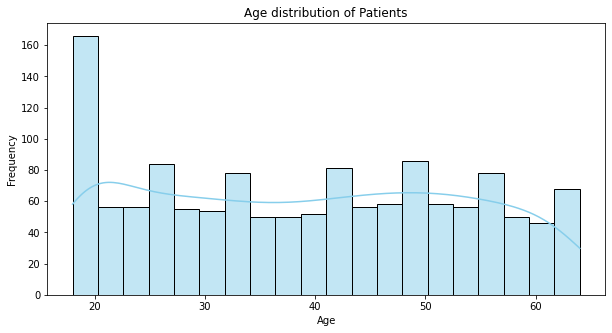

In [61]:
plt.figure(figsize=(10,5))
sns.histplot(df['age'], kde=True, bins=20, color='skyblue')
plt.title("Age distribution of Patients")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.show()

The age distribution of cases on plot shows a kind-of uniform pattern in younger and middle-age groups but there are more with ages between 20–40. This distribution demonstrates that most patients are between early adulthood and middle-aged, while there is a smaller number of older patients. The kde curve which stands for kernel density estimate gives a quasi-smooth line on the age distribution, clearly marking its maxima at mid-20s to 30 stems from this being most repeated in hospital cases. This trend could reflect the demographics served by the hospital or age-specific health issues. Understanding the age distribution helps in planning resources, as the hospital may need to prioritize health services and preventive measures tailored to this dominant age group.

#### Visualize hospitalization charges distribution

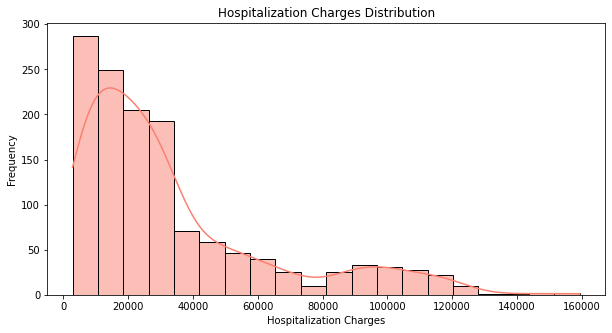

In [26]:
plt.figure(figsize=(10,5))
sns.histplot(df['hospitalization charges'], kde=True, bins=20, color='Salmon')
plt.title("Hospitalization Charges Distribution")
plt.xlabel("Hospitalization Charges")
plt.ylabel("Frequency")
plt.show() 

This skew means that while the majority of patients have quite reasonable hospitalization costs, a small group has huge ones. This is best captured in the kde (Kernel Density Estimate) curve, which shows a large number of people with low charges and trending downward as you move up into higher cost charges. The high-cost outliers are cases with costs that exceed a certain threshold because of either an unusually severe medical condition or due to considerable complexity and being rather expensive in the provision. The insight highlights the difference in hospitalization costs and suggests that there is a group of patients with more stirring medical needs, which leads to an increased national spending. Hospitals could potentially optimize savings by drilling down into these high-cost cases.

#### Boxplot of hospitalization charges by region

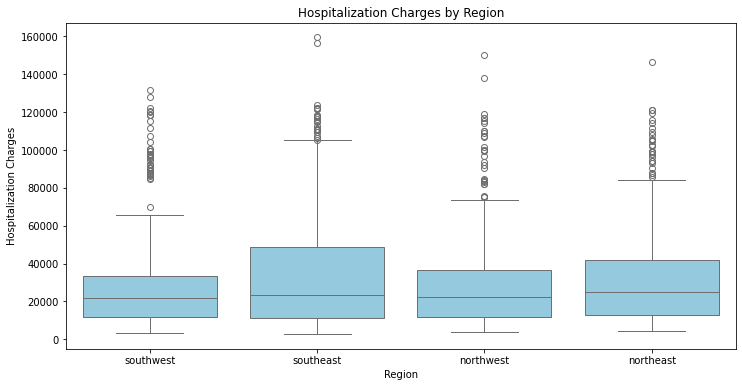

In [62]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='region', y='hospitalization charges', data=df, color="skyblue")
plt.title("Hospitalization Charges by Region")
plt.xlabel("Region")
plt.ylabel("Hospitalization Charges")
plt.show()

Region wise Boxplot of Hospitalization charges can highlight the variation in medical costing by region. Medians of charges differ across regions, specifically some have higher or lower central values meaning hospitalization costs largely depending on the geographic location. Moreover, the median and interquartile range (IQR) differ by region which indicates a greater variation in hospitalization charges within some areas of patient severity or disease complexity. Most areas have outliers, particularly at the top of the scale: people with medical expenses that are extraordinarily high (probably due to unusual diseases or needs for specialized care). Collectively, this variability indicates region-specific forces shaping hospitalisation costs and as considering hospitals it's essential for them to design the healthcare practices more appropriately together with resource deployment of every sector.

#### Boxplot of hospitalization charges by severity level

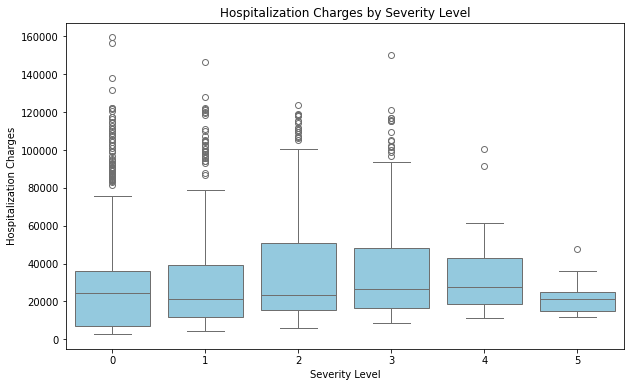

In [35]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='severity level', y='hospitalization charges', data=df, color="skyblue")
plt.title("Hospitalization Charges by Severity Level")
plt.xlabel("Severity Level")
plt.ylabel("Hospitalization Charges")
plt.show()

This boxplot of hospitalization charges by severity level has a clear trend that the higher the degree of severity, medical costs tend to increase. As the severity level increase, median charge also goes up, which indicates a significant difference in charges of patients with higher severities. Moreover, the spreads in between each severity category quantified by ways of interquartile ranges (IQR) imply that charges vary more dramatically with increasing severity levels—indicating differing complexities and resource utilizations for severe cases. Outliers are less frequent in the higher severity levels, suggesting that a small proportion of severe cases need very high costs for treatment. The severity is clearly a major driver of healthcare costs and acutal illness, underscoring the importance of severity as a key driver of healthcare expenses. The hospitals can leverage this insight to allocate resources more effectively and prepare for costlier interventions for higher-severity cases.

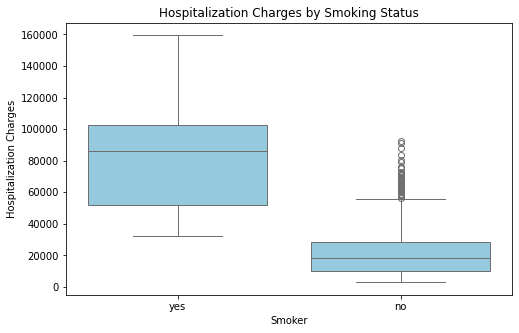

In [37]:
# Analyze the relationship between smoker status and hospitalization charges with a boxplot
plt.figure(figsize=(8, 5))
sns.boxplot(x='smoker', y='hospitalization charges', data=df, color='skyblue')
plt.title("Hospitalization Charges by Smoking Status")
plt.xlabel("Smoker")
plt.ylabel("Hospitalization Charges")
plt.show()

The boxplot of hospitalization charges with smoking status shows that smokers had higher median hospitalizations than the non-smoker group. Smokers also have a seemingly wider interquartile range (IQR) for costs, indicative of greater dispersion in the cost across smokers which may correspond to more varied health complications related to smoking. Moreover, it can also be inferred that there are some outlying cases with abnormally high charges in smokers which might suggest extreme one or more severe diseases developed due to smoking. This pattern highlights smoking as a variable associated with higher hospitalization costs, indicating that hospitals could have to deal more expensive healthcare treatments for smokers. To identify high-cost smokers this finding can help tailor health interventions to better manage the smoking related disease burden thus leading in cost reduction for total amount spent.

In [38]:
# Conduct a t-test for smoking status to see if it's significant in predicting hospitalization charges
smoker_charges = df[df['smoker'] == 'yes']['hospitalization charges']
non_smoker_charges = df[df['smoker'] == 'no']['hospitalization charges']
t_stat, p_val = stats.ttest_ind(smoker_charges, non_smoker_charges)
print("T-statistic:", t_stat)
print("P-value:", p_val)

T-statistic: 46.66489219013773
P-value: 8.275692527491989e-283


The t-test results show an exceptionally high t-statistic (46.66) and an extremely low p-value (8.28e-283), far below any conventional significance level (e.g., 0.05). This indicates a statistically significant difference in hospitalization charges between smokers and non-smokers. The high t-statistic suggests a strong effect, with smokers incurring noticeably higher hospitalization charges compared to non-smokers. This supports the hypothesis that smoking is a major factor driving up medical costs, likely due to smoking-related health complications that require more intensive and costly care. These findings provide robust evidence that smoking status is a critical predictor of increased healthcare expenses, highlighting the importance of targeted healthcare strategies for managing smoking-related health risks to potentially reduce these high costs.

In [40]:
# Calculate correlations between numerical variables and hospitalization charges
correlations = df[['age', 'viral load', 'severity level', 'hospitalization charges']].corr()

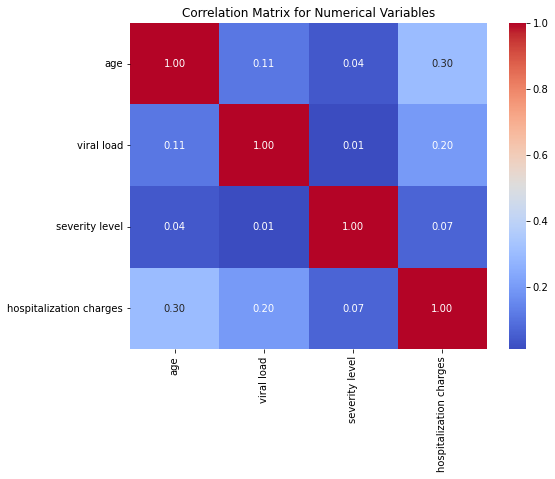

In [41]:
# Display correlation heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlations, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix for Numerical Variables")
plt.show()

In [43]:
# Define predictors and response for regression (no need to add a constant term with sklearn's LinearRegression)
X = df[['age', 'viral load', 'severity level']]
y = df['hospitalization charges']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and fit the linear regression model
reg = LinearRegression()
reg.fit(X_train, y_train)

# Predict and evaluate
y_pred = reg.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Display results
print("Mean Squared Error:", mse)
print("R-squared:", r2)
print("Coefficients:", reg.coef_)
print("Intercept:", reg.intercept_)

Mean Squared Error: 819978824.2609392
R-squared: 0.15492643836656095
Coefficients: [ 551.87771873 2491.86153984 1407.71177832]
Intercept: -15298.580526311729


#### Mean Squared Error
The high MSE suggests that the model’s predictions deviate considerably from the actual hospitalization charges, indicating room for model improvement or the need for additional features to improve predictive accuracy.

#### R-Squared Error
This low R² suggests that other variables not included in the model could also significantly influence hospitalization charges.

#### Coefficients
Each coefficient represents the estimated change in hospitalization charges for a one-unit increase in the predictor variable, holding other variables constant. 

- Age Coefficient (551.88)
  
This positive relationship suggests that older patients tend to incur higher hospitalization costs, possibly due to increased care needs or comorbidities.

- Viral Load Coefficient (2491.86)
  
This strong positive association implies that higher viral loads are correlated with higher medical costs, likely due to more intensive treatments required for severe infections.

- Severity Level Coefficient (1407.71)

Severity has a positive impact on charges, indicating that patients with more severe cases generally face higher hospitalization costs, potentially due to more complex and costly treatments.

#### Intercept: -15,298.58
The intercept represents the estimated hospitalization charges when all predictors are zero. Although negative, it holds little real-world meaning in this context because having zero values for age, viral load, or severity level is unlikely. It primarily shifts the regression line and isn’t a critical component for interpretation here.

### Question-1

#### Which variables are significant in predicting the reason for hospitalization for different regions;

We'll examine how age, sex, smoker status, viral load, and severity level vary by region to identify any significant differences. We can use ANOVA tests and chi-square tests to see which variables differ significantly across regions.

In [55]:
# Analyze variables across regions to find significant predictors for hospitalization reasons
# ANOVA for numerical variables across regions (age, viral load, severity level)
anova_age = f_oneway(df[df['region'] == 'northeast']['age'],
                     df[df['region'] == 'southeast']['age'],
                     df[df['region'] == 'southwest']['age'],
                     df[df['region'] == 'northwest']['age'])

anova_viral_load = f_oneway(df[df['region'] == 'northeast']['viral load'],
                            df[df['region'] == 'southeast']['viral load'],
                            df[df['region'] == 'southwest']['viral load'],
                            df[df['region'] == 'northwest']['viral load'])

anova_severity = f_oneway(df[df['region'] == 'northeast']['severity level'],
                          df[df['region'] == 'southeast']['severity level'],
                          df[df['region'] == 'southwest']['severity level'],
                          df[df['region'] == 'northwest']['severity level'])

# Chi-square test for categorical variables (sex, smoker) across regions
contingency_sex = pd.crosstab(df['sex'], df['region'])
chi2_sex, p_sex, _, _ = chi2_contingency(contingency_sex)

contingency_smoker = pd.crosstab(df['smoker'], df['region'])
chi2_smoker, p_smoker, _, _ = chi2_contingency(contingency_smoker)

# Display ANOVA results and Chi-square results for regional analysis
print("ANOVA Results:")
print("Age across regions:", anova_age)
print("Viral load across regions:", anova_viral_load)
print("Severity level across regions:", anova_severity)

print("\nChi-square Results:")
print("Sex across regions: Chi2 =", chi2_sex, ", p-value =", p_sex)
print("Smoker status across regions: Chi2 =", chi2_smoker, ", p-value =", p_smoker)

ANOVA Results:
Age across regions: F_onewayResult(statistic=0.07978158162436333, pvalue=0.970989069987742)
Viral load across regions: F_onewayResult(statistic=39.46870879747587, pvalue=1.9508165724449588e-24)
Severity level across regions: F_onewayResult(statistic=0.7174932934640621, pvalue=0.5415542568832501)

Chi-square Results:
Sex across regions: Chi2 = 0.43513679354327284 , p-value = 0.9328921288772233
Smoker status across regions: Chi2 = 7.34347776140707 , p-value = 0.06171954839170547


The ANOVA table and Chi-square tests show details of how variables were varied across the regions, where it may influence reasons for hospitalization. The ANOVA results show that the region is not significantly different of age (p =0.97) and severity level(p= 0.54), which are p-value greater than typically used threshold of significance(0.05). However, the viral load distribution is significantly different by region (p < 0.001), meaning that on average regions completely differ in terms of mean Viral load. The reason for hospitalization may be influenced by other factors such as regional inequality in infection or health status.

The Chi-square tests for categorical variables show that sex distribution is not significantly different across regions (p = 0.93), meaning that the gender ratio is relatively consistent across all areas. The smoker status test approaches significance (p = 0.06), suggesting a marginal regional difference in smoking prevalence. Regions with a higher proportion of smokers might be experiencing more respiratory-related hospitalizations.

### Question-2

#### Determine How Well Variables Describe Hospitalization Charges:

We’ll perform a multiple linear regression using viral load, smoking, and severity level as predictors for hospitalization charges. This will help us understand each variable's contribution to hospitalization costs.

In [56]:
# Multiple regression analysis to determine impact of viral load, smoking, and severity level on hospitalization charges
# Encode smoker status as binary for regression analysis
df['smoker_binary'] = np.where(df['smoker'] == 'yes', 1, 0)

# Define predictors and response for regression
X = df[['viral load', 'smoker_binary', 'severity level']]
y = df['hospitalization charges']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and fit the linear regression model
reg = LinearRegression()
reg.fit(X_train, y_train)

# Predict and evaluate
y_pred = reg.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Display regression results
print("\nMultiple Regression Results:")
print("Mean Squared Error:", mse)
print("R-squared:", r2)
print("Coefficients:", reg.coef_)
print("Intercept:", reg.intercept_)


Multiple Regression Results:
Mean Squared Error: 297022745.726812
R-squared: 0.6938871319710769
Coefficients: [ 2989.03394182 57959.32918312  1531.82252562]
Intercept: -10697.331132081774


The multiple regression analysis provides insights into how viral load, smoking status, and severity level impact hospitalization charges. The R-squared value of approximately 0.694 indicates that around 69.4% of the variance in hospitalization charges is explained by these three factors, which suggests a reasonably strong model fit. The mean squared error (MSE) of about 297 million indicates the average squared deviation between predicted and actual charges, which could still be improved with additional predictors or a more complex model.

Looking at the coefficients, smoking status has the largest impact, with a coefficient of approximately 57,959. This suggests that smokers are likely to incur significantly higher hospitalization charges than non-smokers. Viral load also shows a substantial positive effect, with each unit increase associated with a roughly 2,989 increase in charges. Finally, severity level has a positive coefficient (1,531), indicating that higher severity levels are linked to higher hospitalization charges, albeit with a smaller effect size compared to viral load and smoking status.

In summary, smoking status, viral load, and severity level are all positively associated with hospitalization charges, with smoking being the most influential predictor. These findings underscore the impact of smoking and higher viral loads on healthcare costs, which could inform resource allocation and targeted interventions to manage high-cost patient groups.